# Peer-graded Assignment: Statistical Inference Course Project

Author name: Yanyuan Zhu

## Part 1: Simulation Exercise Instructions
Overview: Investigate the exponential distribution in R and compare it with the Central Limit Theorem, so as to
1. Show the sample mean and compare it to the theoretical mean of the distribution
1. Show how variable the sample is (via variance) and compare it to the theoretical variance of the distribution.
1. Show that the distribution is approximately normal.

### Environment setup

In [64]:
library(ggplot2)
library(skimr)

### Model Setup

In [30]:
lambda = 0.2 # rate parameter
n = 40 # number of exponentials 
mean = 1/lambda # mean of the distribution (theoretical)
stdr = 1/lambda # standard deviation of the distribution (theoretical)
n_simu = 1000 # number of simulation required
set.seed(105678) # set seed

Create a matrix named `sample_matrix`, with 1000 rows and 40 columns

In [72]:
sample_matrix <- matrix(
    sample(rexp(n*n_simu, lambda), replace = TRUE)
    , n_simu
    , n
)

### EDA

In [71]:
dim(sample_matrix)

[1] 1000   40

It is a 1000x40 matrix of exponentials, with rows being simulation 1, 2 ... 10000. Each column denotes different exponential numbers

### Mean Comparison

Calculate mean of each rows

In [32]:
sample_matrix_mean <- apply(sample_matrix, 1, mean)

Compare the average of 1000 emprical means, with the theoretical mean, 1/lambda = 25

In [33]:
# average of 1000 empirical means
round(mean(sample_matrix_mean),3)

[1] 5.023

We can see the emprical means are not quite different from the theortical mean

The distribution of the 1000 means are shown as below

In [73]:
skim(sample_matrix_mean)

── Data Summary ────────────────────────
                           Values            
Name                       sample_matrix_mean
Number of rows             1000              
Number of columns          1                 
_______________________                      
Column type frequency:                       
  numeric                  1                 
________________________                     
Group variables            None              

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1  5.02 0.793  2.92  4.47  4.99  5.54
   p100 hist 
1  7.99 ▂▇▇▂▁


It is centered at 4.99 (50% quantile), meanwhile the .25 and .75 quantile are 4.47, and 5.54 respectively

We draw a plot to show distribution of the 1000 empirical means; meanwhile the red vertical line x=5 denotes the theoretical mean

In [58]:
# convert sample_matrix_mean to data frame so as to support ggplot
sample_df <- data.frame(means = sample_matrix_mean)
#head(sample_df)

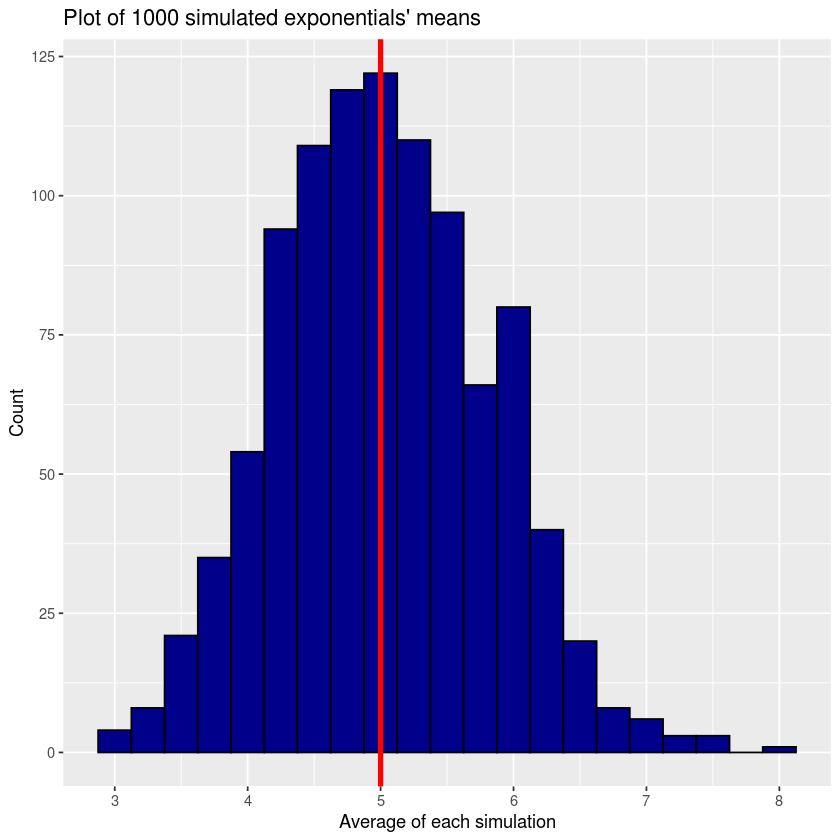

In [89]:
#ggplot(data.frame(medians = medians), aes (x = medians))
g <- NULL
g <- ggplot(data = sample_df, aes(x = means))
g <- g + geom_histogram(color = 'black', fill = 'darkblue', binwidth = 0.25)
g <- g + geom_vline(xintercept = 5, color="red", size = 1.5)
g <- g + ggtitle("Plot of 1000 simulated exponentials' means") + xlab("Average of each simulation") + ylab("Count")
g

Furthermore, we calculate confidence interval of the 1000 emprical means, under the 95% significance level. 

In [75]:
# calculate sdandar deviation of the 1000 means
sd_mean = sd(sample_matrix_mean)

In [78]:
# and the confidence interval is shown as
CI <- mean(sample_matrix_mean) + c(-1,1) * qt(0.975, length(sample_matrix_mean) - 1) * (sd_mean / sqrt(length(sample_matrix_mean)))
CI

[1] 4.973437 5.071806

It shows that under 95% significance level, the 1000 empirical means are in confidence interval (4.97, 5.08)

### Variance comparison

Calculate variance of each rows

In [39]:
sample_matrix_variance <- apply(sample_matrix, 1, var)

Compare the average of 1000 emprical variance, with the theoretical variance, (1/lambda)^2 = 25

In [41]:
# average of 1000 empirical variance
mean(sample_matrix_variance)

[1] 24.84742

We can see the emprical variance are not quite different from the theortical variance

The distribution of the 1000 means are shown as below

In [80]:
skim(sample_matrix_variance)

── Data Summary ────────────────────────
                           Values                
Name                       sample_matrix_variance
Number of rows             1000                  
Number of columns          1                     
_______________________                          
Column type frequency:                           
  numeric                  1                     
________________________                         
Group variables            None                  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1  24.8  10.9  6.82  17.3  22.7  30.2
   p100 hist 
1  88.9 ▇▆▁▁▁


It is centered at 22.7 (50% quantile), meanwhile the .25 and .75 quantile are 17.3, and 30.2 respectively

We draw a plot to show distribution of the 1000 empirical means; meanwhile the red vertical line x=5 denotes the theoretical mean

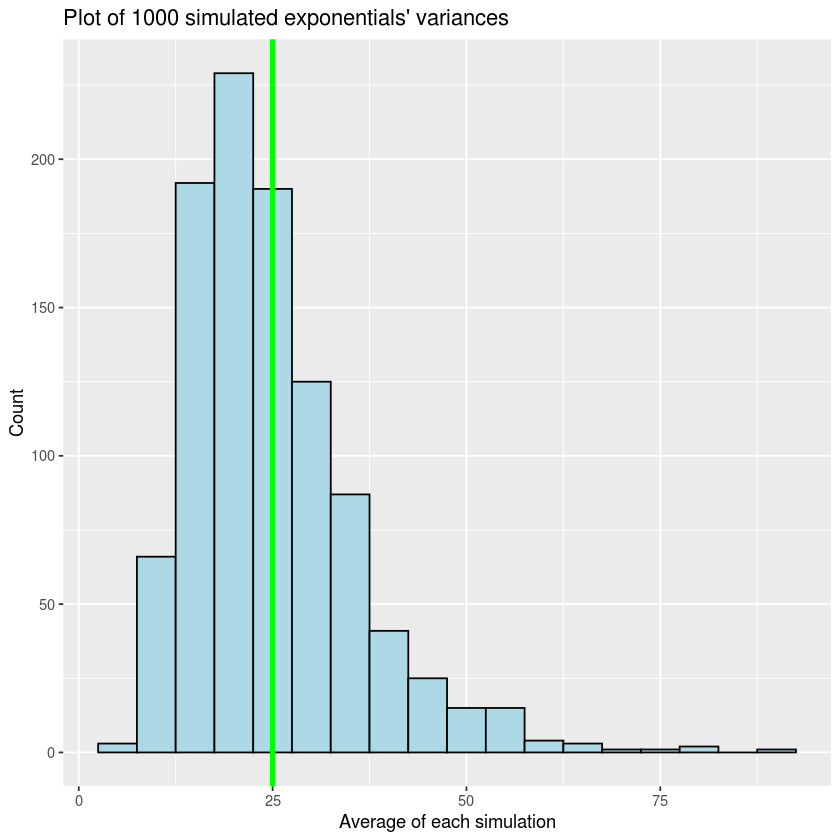

In [90]:
# convert sample_matrix_variance to data frame so as to support ggplot
#sample_df <- data.frame(variance = sample_matrix_variance)
sample_df$variance = sample_matrix_variance

g <- NULL
g <- ggplot(data = sample_df, aes(x = variance))
g <- g + geom_histogram(color = 'black', fill = 'lightblue', binwidth = 5)
g <- g + geom_vline(xintercept = 25, color="green", size = 1.5)
g <- g + ggtitle("Plot of 1000 simulated exponentials' variances") + xlab("Average of each simulation") + ylab("Count")
g

Furthermore, we calculate confidence interval of the 1000 emprical variance, under the 95% significance level. 

In [87]:
# calculate sdandar deviation of the 1000 variance
sd_var = sd(sample_matrix_variance)

# and the confidence interval is shown as
CI_var <- mean(sample_matrix_variance) + c(-1,1) * qt(0.975, length(sample_matrix_variance) - 1) * (sd_var / sqrt(length(sample_matrix_variance)))
CI_var

[1] 24.17130 25.52354

It shows that under 95% significance level, the 1000 empirical variances are in confidence interval (24.17, 25.52), which is pretty close to theoritical variance 25

Due to the central limit theorem (CLT), the distribution of averages of 40 exponentials is very close to a normal distribution.

## Part 2: Basic Inferential Data Analysis Instructions
Overview: Analyze the ToothGrowth data in the R datasets package
1. Load the ToothGrowth data and perform some basic exploratory data analyses
1. Provide a basic summary of the data.
1. Use confidence intervals and/or hypothesis tests to compare tooth growth by supp and dose. (Only use the techniques from class, even if there's other approaches worth considering)
1. State your conclusions and the assumptions needed for your conclusions.

### Assumptions
- The variables are iid
- Tooth growth follows a normal distribution
- Variances of tooth growth are different when using different supplement and dosage.

### Conclusions
- Supplement OJ has greater effect on tooth growth, compared with the supplement VC
- Dose increase, i.e. from 0.5 mg to 1.0 mg then to 2.0 mg, has greater effect on tooth growth, accordingly

### load data and EDA

In [97]:
data(ToothGrowth)
head(ToothGrowth)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


In [94]:
dim(ToothGrowth)

[1] 60  3

### Basic summary of the data

In [95]:
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [109]:
summary(ToothGrowth)

      len        supp         dose      
 Min.   : 4.20   OJ:30   Min.   :0.500  
 1st Qu.:13.07   VC:30   1st Qu.:0.500  
 Median :19.25           Median :1.000  
 Mean   :18.81           Mean   :1.167  
 3rd Qu.:25.27           3rd Qu.:2.000  
 Max.   :33.90           Max.   :2.000  

In [96]:
skim(ToothGrowth)

── Data Summary ────────────────────────
                           Values     
Name                       ToothGrowth
Number of rows             60         
Number of columns          3          
_______________________               
Column type frequency:                
  factor                   1          
  numeric                  2          
________________________              
Group variables            None       

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts    
1 supp                  0             1 FALSE          2 OJ: 30, VC: 30

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 len                   0             1 18.8  7.65    4.2  13.1  19.2  25.3
2 dose                  0             1  1.17 0.629   0.5   0.5   1     2  
   p100 hist 
1  33.9 ▅▃▅▇▂
2   2

It's a 60 x 3 matrix, and each column denots
- `len` (numeric) : Tooth length, avraging at 19.2, and 25th/75th quantiles are 13.1/25.3
- `supp` (factor) : Supplement type (OJ or VD): 30 OJs and 30 VCs
- `dose` (numeric): Tooth dose in milligrams, averaging at 1, and 25th/75th quantiles are 0.5/2

### Hypothesis testing for the supplement

- $H_0: len(OJ) = len(VC)$: there is no difference in tooth growth when using the supplement OJ and VC
- $H_a: len(OJ) > len(VC)$: there is more tooth growth using OJ, than that using VC

In [131]:
# Split data frame by supp
OJ <- ToothGrowth[ToothGrowth$supp=='OJ',]
VC <- ToothGrowth[ToothGrowth$supp=='VC',]

Under 95% confidence level, we run t test

In [115]:
t.test(OJ$len, VC$len, alternative = 'greater', paired = FALSE, var.equal = FALSE, conf.level = 0.95)


	Welch Two Sample t-test

data:  OJ$len and VC$len
t = 1.9153, df = 55.309, p-value = 0.03032
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4682687       Inf
sample estimates:
mean of x mean of y 
 20.66333  16.96333 


With p-value = 0.03 < 0.05, we reject the null hypothesis. i.e. there is approximately 3% chance of obtaining an extreme value for the difference in mean of tooth growth. Besides, based on the low p value, we can conclude it's very likely that supplement OJ, the greater the effect on tooth growth than supplement VC

We draw a plot to show that accordingly

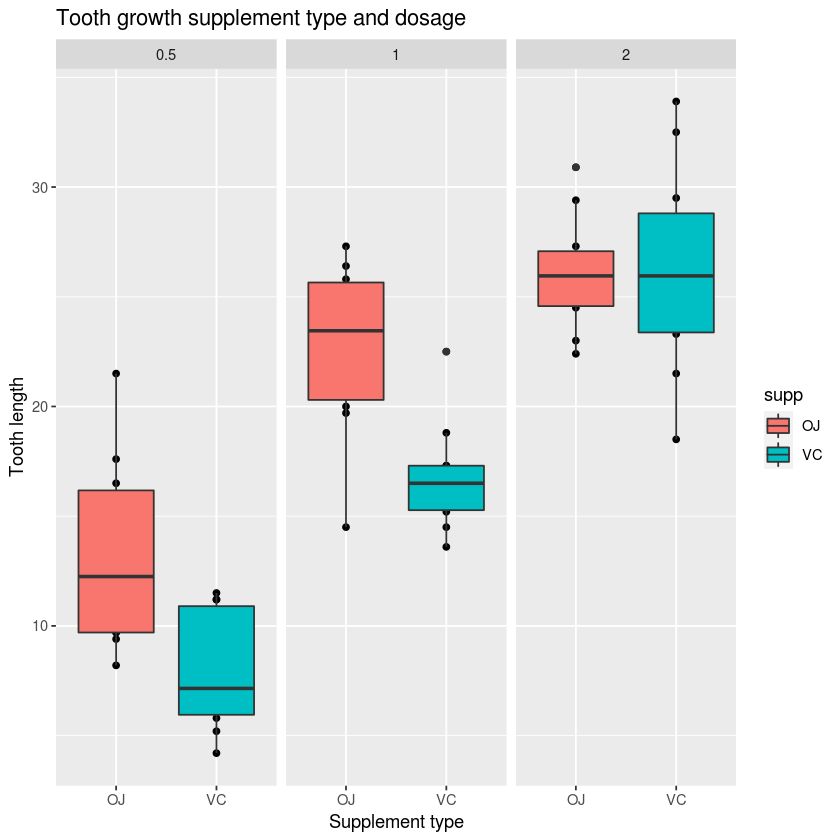

In [124]:
qplot(x = supp, y = len, data=ToothGrowth, facets=~dose, main="Tooth growth supplement type and dosage",xlab="Supplement type", ylab="Tooth length") + geom_boxplot(aes(fill = supp))

### Hypothesis testing for the dose

- $H_0$: there is no difference in tooth growth among doses
- $H_a$: there are more tooth growth as the dose increases

In [126]:
unique(ToothGrowth$dose)

[1] 0.5 1.0 2.0

In [127]:
# Split data frame by dose
Dose05 <- ToothGrowth[ToothGrowth$dose==0.5,]
Dose10 <- ToothGrowth[ToothGrowth$dose==1.0,]
Dose20 <- ToothGrowth[ToothGrowth$dose==2.0,]

In [128]:
t.test(Dose05$len
       , Dose10$len
       , alternative = "less"
       , paired = FALSE
       , var.equal = FALSE
       , conf.level = 0.95
      )


	Welch Two Sample t-test

data:  Dose05$len and Dose10$len
t = -6.4766, df = 37.986, p-value = 6.342e-08
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -6.753323
sample estimates:
mean of x mean of y 
   10.605    19.735 


p-value << 0.05, which means we reject the null hypo. Increase of dose from 0.5 mg to 1.0 mg, does lead to tooth growth

In [129]:
t.test(Dose10$len
       , Dose20$len
       , alternative = "less"
       , paired = FALSE
       , var.equal = FALSE
       , conf.level = 0.95
      )


	Welch Two Sample t-test

data:  Dose10$len and Dose20$len
t = -4.9005, df = 37.101, p-value = 9.532e-06
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf -4.17387
sample estimates:
mean of x mean of y 
   19.735    26.100 


p-value << 0.05, which means we reject the null hypo. Increase of dose from 1.0 mg to 2.0 mg, does lead to tooth growth